Shortest path from Islamabad to Karachi: ['Islamabad', 'Rawalpindi', 'Quetta', 'Karachi']


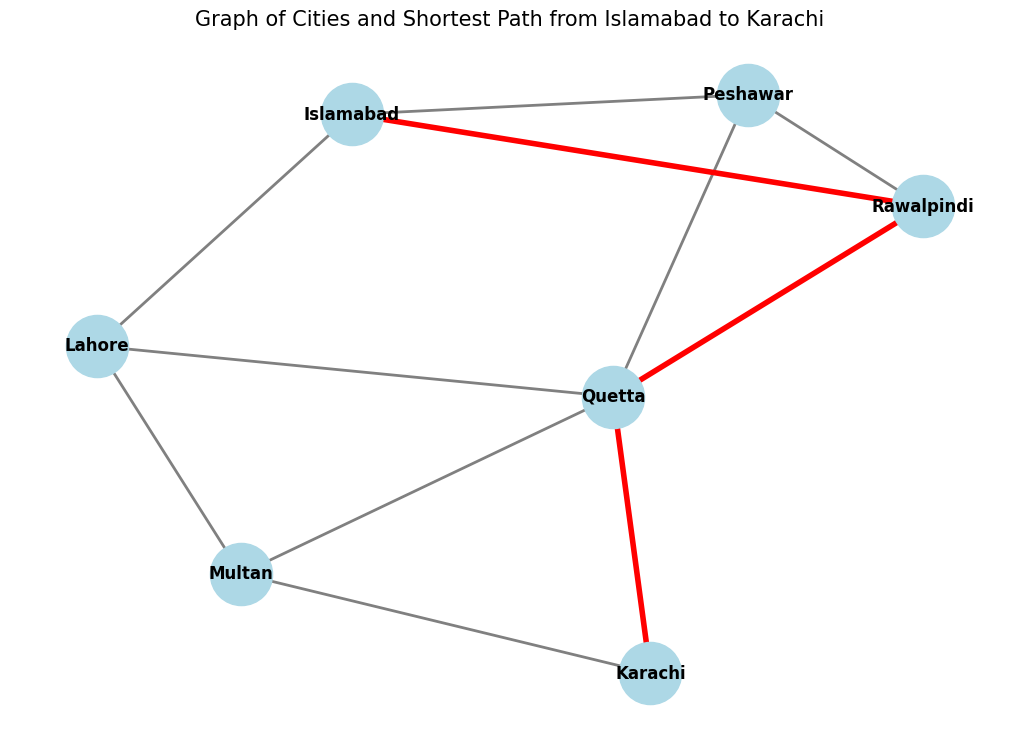

In [4]:
#Importing Libraries
import networkx as nx  #networkx: A library for creating and visualizing graphs.
import matplotlib.pyplot as plt  #matplotlib.pyplot: Used to plot the graph.
from collections import deque  #deque: A double-ended queue from the collections module, used for the BFS algorithm to store the paths.


# BFS function to find the shortest path
def bfs_shortest_path(graph, start, goal): #This function finds the shortest path from the start city (Islamabad) to the goal city (Karachi) using BFS.


   #Initialization:
    visited = set() #visited: A set to track cities that have been visited to avoid revisiting them.
    queue = deque([[start]]) #queue: A queue to store the paths being explored.
    #Initially, the queue contains only the start city as a path [[start]].


   #Edge Case (Start is the Goal):
    if start == goal:
        return [start]
        #If the start city is the same as the goal, the function immediately returns the path with just the start city.


    #BFS Loop:
    while queue:
        path = queue.popleft()
        city = path[-1]
        #The loop continues as long as there are paths in the queue.
        # The popleft() method retrieves and removes the first path from the queue,
        #and city stores the last city in this path (the current city to explore).


        #Neighbor Exploration:
        if city not in visited:
            for neighbor in graph[city]:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
                #For each neighbor of the current city, a new path is created by appending the neighbor to the current path.
                # The new path is then added to the queue for further exploration.


                #Check if Goal is Found:
                if neighbor == goal:
                    return new_path
            #If a neighbor city is the goal, the function returns the new path as the shortest path.


           #Mark City as Visited:
            visited.add(city)
    #After exploring all neighbors of a city, the city is marked as visited.


   #Return None if No Path is Found:
    return None
   #If the queue is exhausted without finding the goal, the function returns None.


# Define the cities and their connections
graph = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}
#The cities and their direct connections (highways) are represented as a dictionary
# where the key is the city name and the value is a list of neighboring cities.


#Finding the Shortest Path
# Get the shortest path from Islamabad to Karachi
shortest_path = bfs_shortest_path(graph, 'Islamabad', 'Karachi')
print("Shortest path from Islamabad to Karachi:", shortest_path)
#This calls the bfs_shortest_path function, passing the graph, the start city (Islamabad), and the goal city (Karachi).
# The result (the shortest path) is stored in shortest_path, and it is printed.


# Create a graph object using networkx
G = nx.Graph()
#A networkx graph object is created.


# Add edges (connections between cities) to the graph
for city, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(city, neighbor)
#For each city and its neighbors in the graph, edges are added to the networkx graph,
#representing the connections (highways) between the cities.


# Position nodes using a layout
pos = nx.spring_layout(G, seed=42)  # Seed makes layout deterministic
#The spring_layout algorithm is used to position the nodes (cities) in a visually
#appealing way. The seed=42 ensures consistent layout across runs.


# Draw the graph with all connections
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12,
        font_color='black', font_weight='bold', edge_color='gray', width=2)
#The graph is drawn with city names as labels. The nodes are colored light blue,
#and the edges (connections) are drawn in gray.


# Highlight the shortest path in a different color (red)
if shortest_path:
    # Create pairs of cities in the shortest path to highlight them
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=4)
#If a shortest path is found, the edges between the cities in the path are extracted
#and drawn in red to highlight the path from Islamabad to Karachi.


# Show the plot
plt.title('Graph of Cities and Shortest Path from Islamabad to Karachi', size=15)
plt.show()
#The graph is displayed with the title "Graph of Cities and Shortest Path from Islamabad to Karachi."

